In [1]:
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
import lightkurve as lk
import astropy.units as u
import astropy.constants as c
from astropy.timeseries import LombScargle
from astropy.modeling import models, fitting
import pandas as pd


%matplotlib inline

In [2]:
# Define row headings
row_headings = ["Orbital Frequency (days⁻¹)", "Orbital Period (hours)", "Spin Frequency (days⁻¹)", "Spin Period (seconds)", "Model Spin Period (seconds)", "Model Spin Period Error (seconds)", "Model Spin Period Reduced χ2"]

# Create an empty DataFrame with NaNs
data = pd.DataFrame(np.nan, index=row_headings, columns=range(0, 4))

data.columns = ['0: Sector80', '1: Sector79', '2: Sector81', '3: Sector74']

## DQ Herculis 0

In [3]:
lc0 = np.genfromtxt("dq_her5.csv", delimiter=",")
time0 = lc0[0]
flux0 = lc0[1]
flux_error0 = lc0[2]

(3495.0, 3496.0)

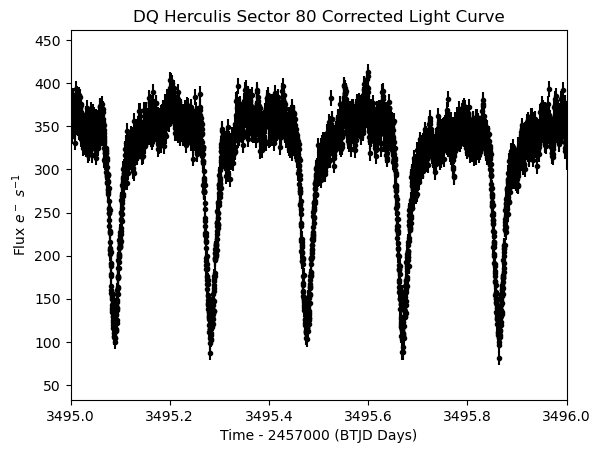

In [4]:
plt.errorbar(time0, flux0, yerr=flux_error0, fmt='k.')
plt.title('DQ Herculis Sector 80 Corrected Light Curve')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(3495, 3496)

Text(30, 0.03, '6$\\Omega$')

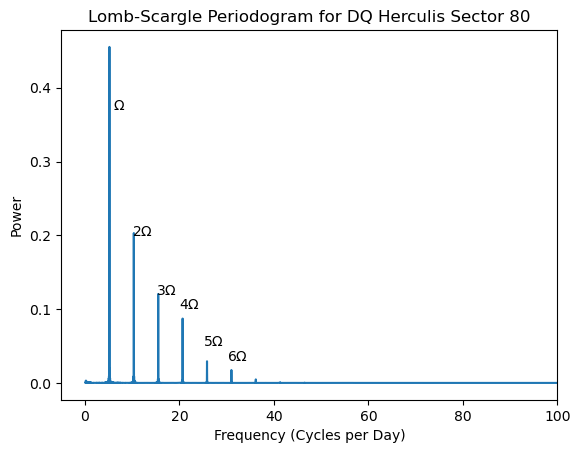

In [5]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time0)))  # Nyquist frequency

frequencies01 = np.linspace(min_freq, max_freq, 1000000) 

power01 = LombScargle(time0, flux0).power(frequencies01)

plt.plot(frequencies01, power01)
plt.title('Lomb-Scargle Periodogram for DQ Herculis Sector 80')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 100)
plt.text(6, 0.37, '$\Omega$')
plt.text(10, 0.2, '2$\Omega$')
plt.text(15, 0.12, '3$\Omega$')
plt.text(20, 0.1, '4$\Omega$')
plt.text(25, 0.05, '5$\Omega$')
plt.text(30, 0.03, '6$\Omega$' )

(0.0, 0.0002)

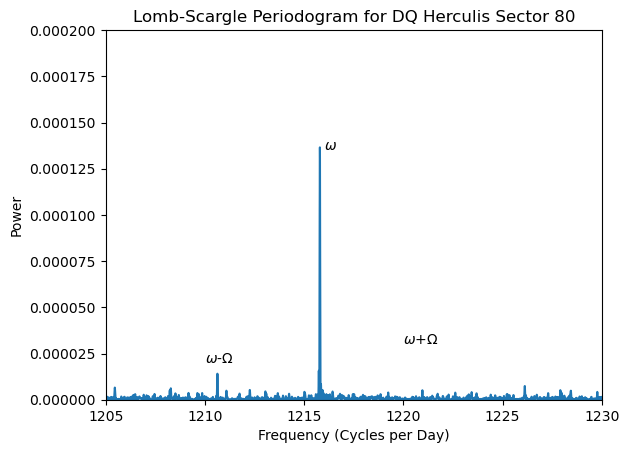

In [6]:
plt.plot(frequencies01, power01)
plt.title('Lomb-Scargle Periodogram for DQ Herculis Sector 80')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(1205, 1230)
plt.text(1216, 0.000135, '$\omega$')
plt.text(1210, 0.00002, '$\omega$-$\Omega$')
plt.text(1220, 0.00003, '$\omega$+$\Omega$')
plt.ylim(0, 0.0002)

In [7]:
forb0 = frequencies01[np.argmax(power01)]
print(forb0)

porb0 = 1/forb0
porb0h = porb0*u.day.to(u.hour)
print(porb0h)

min_freq = 75  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time0)))  # Nyquist frequency
frequencies02 = np.linspace(min_freq, max_freq, 1000000) 
power02 = LombScargle(time0, flux0).power(frequencies02)


fspin0 = frequencies02[np.argmax(power02)]
print(fspin0)

pspin0 = 1/fspin0
pspin0s = pspin0*u.day.to(u.s)
print(pspin0s)

5.164978077787626
4.646679935238021
1215.7918786985435
71.0647944880893


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

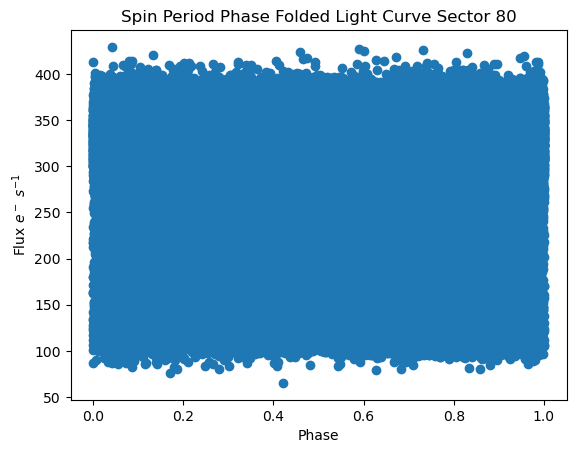

In [8]:
t0 = time0[0]

# Compute cycle number
n0 = (time0 - t0) / pspin0

# Compute new x-axis (integer cycles + phase)
spin_folded0 = (n0 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded0)
spin_folded_sorted0 = spin_folded0[sorted_indices]
spin_flux_sorted0 = flux0[sorted_indices]

plt.scatter(spin_folded_sorted0, spin_flux_sorted0)
plt.title('Spin Period Phase Folded Light Curve Sector 80')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

In [9]:
mask0 = (time0<time0[837])
orbital_section0 = time0[mask0]
orbital_flux_section0 = flux0[mask0]

min_flux0 = np.argmin(orbital_flux_section0)

print(min_flux0)  # index of minimum flux
print(len(orbital_section0)) #number of points per phase
print(len(flux0))

421
837
111469


In [10]:
new_time0 = np.copy(time0)

for i in range(350, 490): # dip range
    for j in range(0,133):  # number of phases in the data set
        new_time0[i+(837*j)]=np.nan
        
print(new_time0)

[3479.89025212 3479.89048361 3479.89071509 ... 3506.33875221 3506.33898369
 3506.33921517]


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

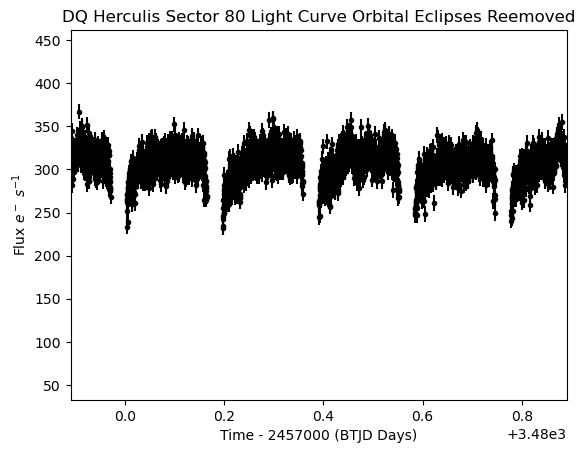

In [11]:
masked_time0 = time0[~np.isnan(new_time0)]
masked_flux0 = flux0[~np.isnan(new_time0)]
masked_flux_error0 = flux_error0[~np.isnan(new_time0)]

plt.errorbar(masked_time0, masked_flux0, masked_flux_error0, fmt='k.')
plt.xlim(3479.890252123518, 3480.890252123518)
plt.title('DQ Herculis Sector 80 Light Curve Orbital Eclipses Reemoved')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-1.577e+00 -3.350e+00 ...  5.592e+00  3.626e+00]
           x: [ 8.284e-01  1.216e+03  2.328e-03  3.062e+02]
        cost: 1677108.7524288013
         jac: [[ 8.693e-02  5.141e+00 -3.484e-01  1.097e-01]
               [-8.290e-02  5.551e+00 -3.762e-01  1.100e-01]
               ...
               [-1.615e-02  1.147e+01 -5.772e-01  1.121e-01]
               [-1.049e-01 -3.865e+00  1.944e-01  1.113e-01]]
        grad: [-5.468e+01  2.183e+04 -1.138e+03  3.203e-02]
  optimality: 21831.627628768714
 active_mask: [0 0 0 0]
        nfev: 37
        njev: None
   param_cov: [[ 2.175e-03 -1.574e-09 -1.253e-08  7.843e-07]
               [-1.574e-09  1.886e-05  3.724e-04  3.673e-08]
               [-1.253e-08  3.724e-04  7.434e-03  7.255e-07]
               [ 7.843e-07  3.673e-08  7.255e-07  1.087e-03]]
36.1266775613123
[[ 7.85654690e-02 -5.68725184e-08 -4.52561430e-07  2.83344753e-05]
 [-5.

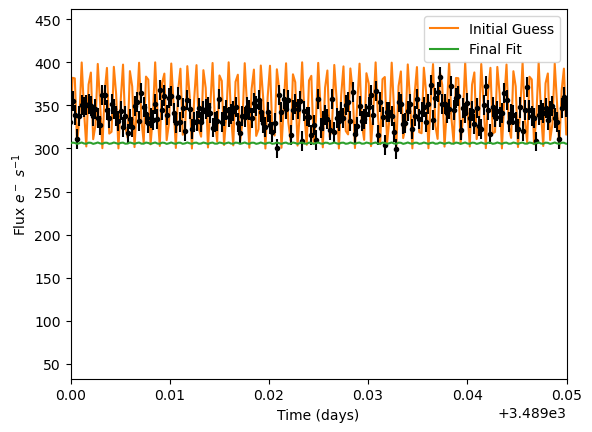

In [12]:
sine01 = models.Sine1D(amplitude=50, frequency=1215.7918786985435, phase=0)
sine02 = models.Sine1D(amplitude=10, frequency=1215.7918786985435-5.164978077787626, phase=0.25)
constant0 = models.Const1D(amplitude=350)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_spin0 = sine01 + constant0 #+ sine02 

def tie_freq(model):
    return model.frequency_0 - 5.164978077787626

sine02.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine02.phase.tied = tie_phase

sin_final_spin0 = fit_sin(sin_init_spin0, masked_time0, masked_flux0, weights=1/masked_flux_error0, maxiter=1000,acc=1e-10)

print(fit_sin.fit_info)

chi2_spin0 = np.sum(((sin_final_spin0(masked_time0)-masked_flux0)/masked_flux_error0)**2)
chi2_r_spin0 = chi2_spin0/(len(masked_time0)-3)
print(chi2_r_spin0)

pfit_spin0 = fit_sin.fit_info.x
pcov_spin0 = fit_sin.fit_info.param_cov * chi2_r_spin0
print(pcov_spin0)
error_spin0 = []

for i in range(len(pfit_spin0)):
    error_spin0.append(np.absolute(pcov_spin0[i][i])**0.5)
        
perr_leastsq_spin0 = np.array(error_spin0) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_spin0)
print("perr = \ ", perr_leastsq_spin0)

plt.errorbar(masked_time0, masked_flux0, masked_flux_error0, fmt='k.', zorder=2),
plt.plot(masked_time0, sin_init_spin0(masked_time0),'C1', label='Initial Guess', zorder=1)
plt.plot(masked_time0, sin_final_spin0(masked_time0),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.legend()
plt.xlim(3489, 3489.05)
plt.show()

In [13]:
pspin0_model = 1/pfit_spin0[1]
pspin0_models = pspin0_model*u.day.to(u.s)

pspin0_model_error = (1/pfit_spin0[1])*(perr_leastsq_spin0[1])
pspin0_model_errors = pspin0_model_error*u.day.to(u.s)

print(pspin0_models)
print(pspin0_model_errors)

71.06476014135866
1.8549029441682272


## DQ Herculis 1

In [14]:
lc1 = np.genfromtxt("dq_her6.csv", delimiter=",")
time1 = lc1[0]
flux1 = lc1[1]
flux_error1 = lc1[2]

(3455.0, 3456.0)

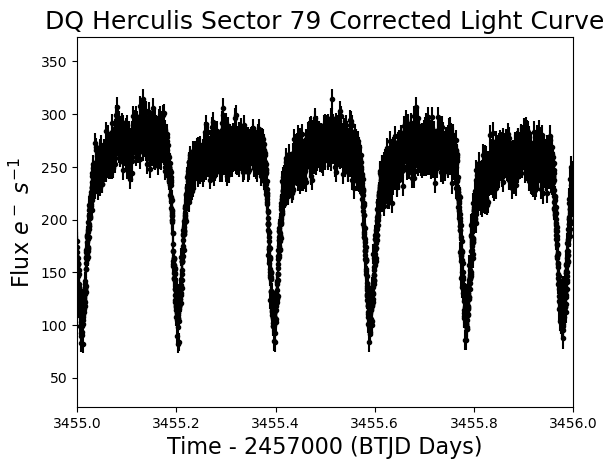

In [15]:
plt.errorbar(time1, flux1, yerr=flux_error1, fmt='k.')
plt.title('DQ Herculis Sector 79 Corrected Light Curve', fontsize =18)
plt.xlabel('Time - 2457000 (BTJD Days)', fontsize=16)
plt.ylabel('Flux $e^-$ $s^{-1}$', fontsize=16)
plt.xlim(3455,3456)

Text(30, 0.03, '6$\\Omega$')

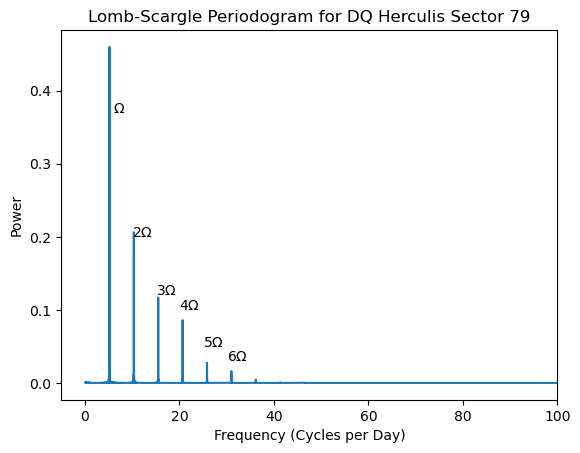

In [16]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time1)))  # Nyquist frequency

frequencies1 = np.linspace(min_freq, max_freq, 1000000) 

power1 = LombScargle(time1, flux1).power(frequencies1)

plt.plot(frequencies1, power1)
plt.title('Lomb-Scargle Periodogram for DQ Herculis Sector 79')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 100)
plt.text(6, 0.37, '$\Omega$')
plt.text(10, 0.2, '2$\Omega$')
plt.text(15, 0.12, '3$\Omega$')
plt.text(20, 0.1, '4$\Omega$')
plt.text(25, 0.05, '5$\Omega$')
plt.text(30, 0.03, '6$\Omega$' )

(0.0, 0.0002)

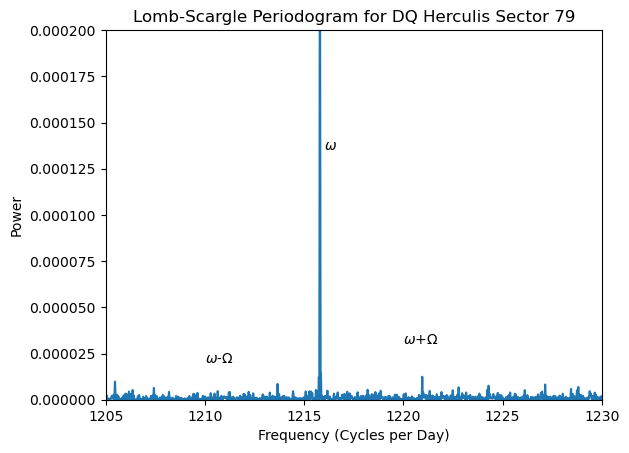

In [17]:
plt.plot(frequencies1, power1)
plt.title('Lomb-Scargle Periodogram for DQ Herculis Sector 79')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(1205, 1230)
plt.text(1216, 0.000135, '$\omega$')
plt.text(1210, 0.00002, '$\omega$-$\Omega$')
plt.text(1220, 0.00003, '$\omega$+$\Omega$')
plt.ylim(0, 0.0002)

In [18]:
forb1 = frequencies1[np.argmax(power1)]
print(forb1)

porb1 = 1/forb1
porb1h = porb1*u.day.to(u.hour)
print(porb1h)

min_freq = 75  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time1)))  # Nyquist frequency
frequencies12 = np.linspace(min_freq, max_freq, 1000000) 
power12 = LombScargle(time1, flux1).power(frequencies12)


fspin1 = frequencies12[np.argmax(power12)]
print(fspin1)

pspin1 = 1/fspin1
pspin1s = pspin1*u.day.to(u.s)
print(pspin1s)

5.164911876857292
4.646739493763318
1215.793112355851
71.06472237910782


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

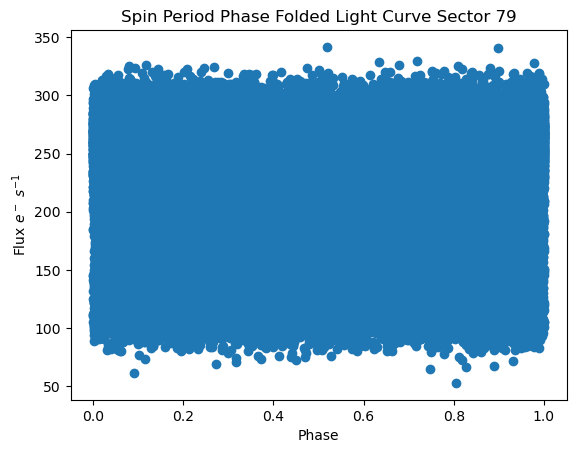

In [19]:
t1 = time1[0]

# Compute cycle number
n1 = (time1 - t1) / pspin1

# Compute new x-axis (integer cycles + phase)
spin_folded1 = (n1 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded1)
spin_folded_sorted1 = spin_folded1[sorted_indices]
spin_flux_sorted1 = flux1[sorted_indices]

plt.scatter(spin_folded_sorted1, spin_flux_sorted1)
plt.title('Spin Period Phase Folded Light Curve Sector 79')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

In [20]:
mask1 = (time1<time1[837])
orbital_section1 = time1[mask1]
orbital_flux_section1 = flux1[mask1]

min_flux1 = np.argmin(orbital_flux_section1)

print(min_flux1)
print(len(orbital_section1)) #number of points per phase
print(len(flux1))

628
837
114450


In [21]:
new_time1 = np.copy(time1)

for i in range(550, 700): # dip range
    for j in range(0,133):  # number of phases in the data set
        new_time1[i+(837*j)]=np.nan
        
print(new_time1)

[3452.53995625 3452.54018773 3452.54041922 ... 3479.67567919 3479.67591067
 3479.67614216]


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

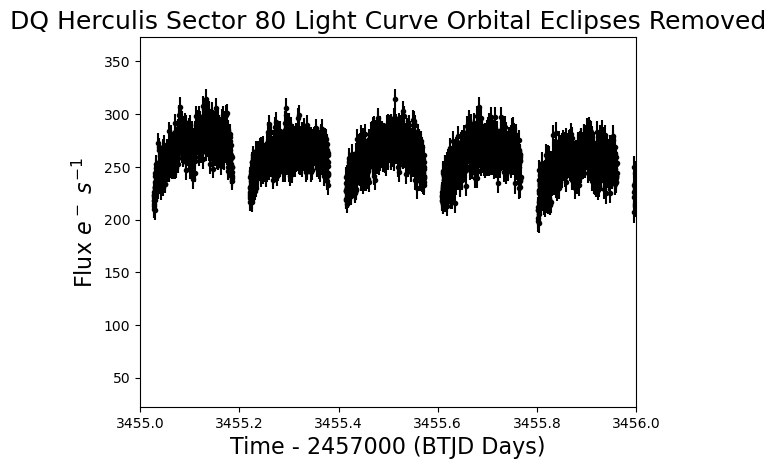

In [22]:
masked_time1 = time1[~np.isnan(new_time1)]
masked_flux1 = flux1[~np.isnan(new_time1)]
masked_flux_error1 = flux_error1[~np.isnan(new_time1)]

plt.errorbar(masked_time1, masked_flux1, masked_flux_error1, fmt='k.')
plt.xlim(3455,3456)
plt.title('DQ Herculis Sector 80 Light Curve Orbital Eclipses Removed', fontsize=18)
plt.xlabel('Time - 2457000 (BTJD Days)', fontsize=16)
plt.ylabel('Flux $e^-$ $s^{-1}$', fontsize=16)

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-1.868e-01 -2.170e+00 ... -2.978e+00 -2.354e+00]
           x: [ 5.977e-01  1.216e+03 -2.285e-02  2.428e+02  1.271e-01]
        cost: 1146489.6721988053
         jac: [[ 1.295e-01  1.395e+00 ...  1.410e-01  1.022e-01]
               [ 2.892e-02 -6.169e+00 ...  1.402e-01 -1.140e-01]
               ...
               [-1.240e-01 -4.683e+00 ...  1.407e-01 -1.090e-01]
               [ 9.006e-02 -7.038e+00 ...  1.415e-01  1.086e-01]]
        grad: [-2.214e+02  1.010e+03 -3.527e+01  9.456e-02  5.000e+01]
  optimality: 1009.5756544315194
 active_mask: [0 0 0 0 0]
        nfev: 54
        njev: None
   param_cov: [[ 1.765e-03 -2.268e-07 ...  5.988e-07  3.732e-05]
               [-2.268e-07  1.978e-06 ...  5.997e-09  1.207e-06]
               ...
               [ 5.988e-07  5.997e-09 ...  8.818e-04 -4.332e-08]
               [ 3.732e-05  1.207e-06 ... -4.332e-08  1.786e-03]]
20.03529445418

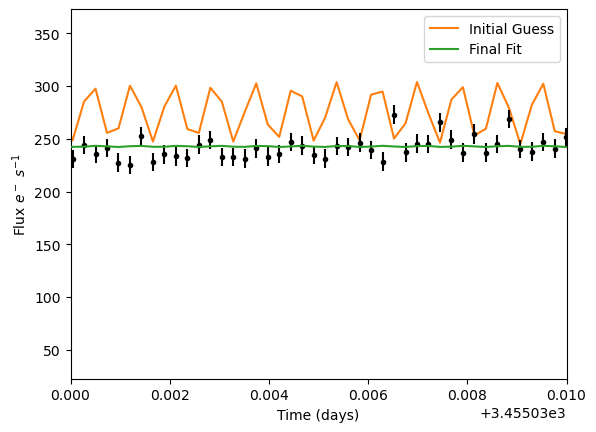

In [23]:
sine11 = models.Sine1D(amplitude=30, frequency=1215.793112355851, phase=0)
sine12 = models.Sine1D(amplitude=10, frequency=1215.793112355851-5.164911876857292, phase=0.25)
constant1 = models.Const1D(amplitude=275)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_spin1 = sine11 + constant1 + sine12

def tie_freq(model):
    return model.frequency_0 - 5.164911876857292

sine12.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine12.phase.tied = tie_phase

sin_final_spin1 = fit_sin(sin_init_spin1, masked_time1, masked_flux1, weights=1/masked_flux_error1, maxiter=1000,acc=1e-10)

print(fit_sin.fit_info)

chi2_spin1 = np.sum(((sin_final_spin1(masked_time1)-masked_flux1)/masked_flux_error1)**2)
chi2_r_spin1 = chi2_spin1/(len(time1)-3)
print(chi2_r_spin1)

pfit_spin1 = fit_sin.fit_info.x
pcov_spin1 = fit_sin.fit_info.param_cov * chi2_r_spin1
print(pcov_spin1)
error_spin1 = []

for i in range(len(pfit_spin1)):
    error_spin1.append(np.absolute(pcov_spin1[i][i])**0.5)
        
perr_leastsq_spin1 = np.array(error_spin1) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_spin1)
print("perr = \ ", perr_leastsq_spin1)

plt.errorbar(masked_time1, masked_flux1, masked_flux_error1, fmt='k.', zorder=2),
plt.plot(masked_time1, sin_init_spin1(masked_time1),'C1', label='Initial Guess', zorder=1)
plt.plot(masked_time1, sin_final_spin1(masked_time1),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.legend()
plt.xlim(3455.03,3455.04)
plt.show()

In [24]:
pspin1_model = 1/pfit_spin1[1]
pspin1_models = pspin1_model*u.day.to(u.s)

pspin1_model_error = (1/pfit_spin1[1])*(perr_leastsq_spin1[1])
pspin1_model_errors = pspin1_model_error*u.day.to(u.s)

print(pspin1_models)
print(pspin1_model_errors)

71.06485935281735
0.4473938994388946


## DQ Herculis 2

In [25]:
lc2 = np.genfromtxt("dq_her7.csv", delimiter=",")
time2 = lc2[0]
flux2 = lc2[1]
flux_error2 = lc2[2]

(3510.0, 3511.0)

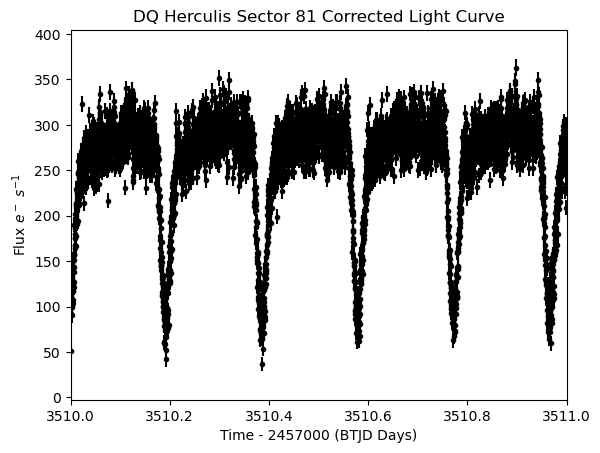

In [26]:
plt.errorbar(time2, flux2, yerr=flux_error2, fmt='k.')
plt.title('DQ Herculis Sector 81 Corrected Light Curve')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(3510,3511)

Text(30, 0.03, '6$\\Omega$')

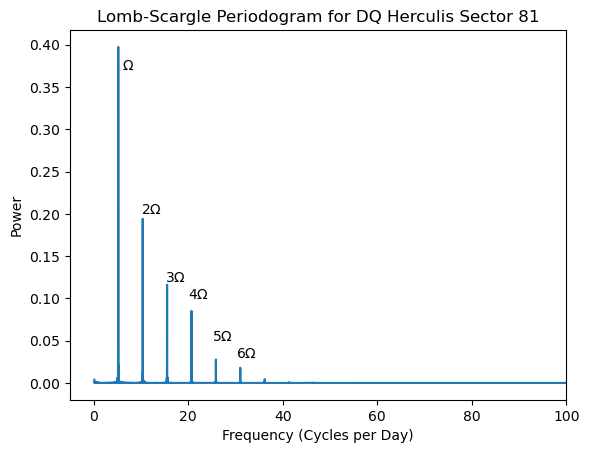

In [27]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time2)))  # Nyquist frequency

frequencies21 = np.linspace(min_freq, max_freq, 1000000) 

power21 = LombScargle(time2, flux2).power(frequencies21)

plt.plot(frequencies21, power21)
plt.title('Lomb-Scargle Periodogram for DQ Herculis Sector 81')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 100)
plt.text(6, 0.37, '$\Omega$')
plt.text(10, 0.2, '2$\Omega$')
plt.text(15, 0.12, '3$\Omega$')
plt.text(20, 0.1, '4$\Omega$')
plt.text(25, 0.05, '5$\Omega$')
plt.text(30, 0.03, '6$\Omega$' )

(0.0, 0.0002)

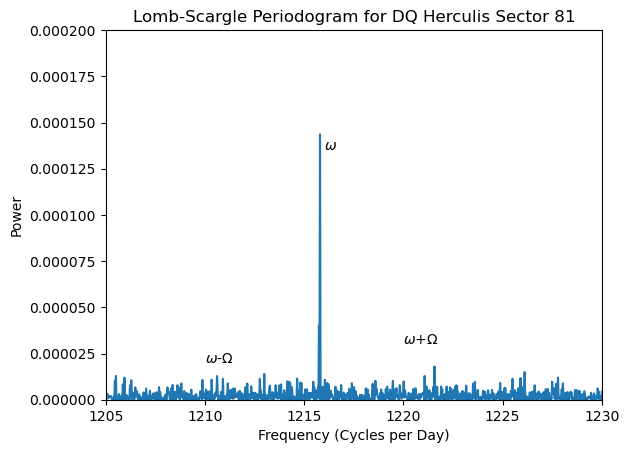

In [28]:
plt.plot(frequencies21, power21)
plt.title('Lomb-Scargle Periodogram for DQ Herculis Sector 81')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(1205, 1230)
plt.text(1216, 0.000135, '$\omega$')
plt.text(1210, 0.00002, '$\omega$-$\Omega$')
plt.text(1220, 0.00003, '$\omega$+$\Omega$')
plt.ylim(0, 0.0002)

In [29]:
forb2 = frequencies21[np.argmax(power21)]
print(forb2)

porb2 = 1/forb2
porb2h = porb2*u.day.to(u.hour)
print(porb2h)

min_freq = 75  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time2)))  # Nyquist frequency
frequencies22 = np.linspace(min_freq, max_freq, 1000000) 
power22 = LombScargle(time2, flux2).power(frequencies22)


fspin2 = frequencies22[np.argmax(power22)]
print(fspin2)

pspin2 = 1/fspin2
pspin2s = pspin2*u.day.to(u.s)
print(pspin2s)

5.165064630178628
4.646602069560161
1215.7974780137176
71.06446720152283


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

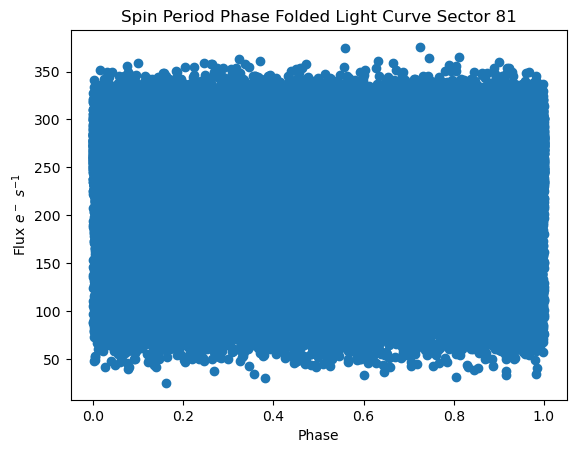

In [30]:
t2 = time2[0]

# Compute cycle number
n2 = (time2 - t2) / pspin2

# Compute new x-axis (integer cycles + phase)
spin_folded2 = (n2 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded2)
spin_folded_sorted2 = spin_folded2[sorted_indices]
spin_flux_sorted2 = flux2[sorted_indices]

plt.scatter(spin_folded_sorted2, spin_flux_sorted2)
plt.title('Spin Period Phase Folded Light Curve Sector 81')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

In [31]:
mask2 = (time2<time2[837])
orbital_section2 = time2[mask2]
orbital_flux_section2 = flux2[mask2]

min_flux2 = np.argmin(orbital_flux_section2)

print(min_flux2)
print(len(orbital_section2)) #number of points per phase
print(len(flux2))

664
837
110638


In [32]:
new_time2 = np.copy(time2)

for i in range(590, 730): # dip range
    for j in range(0,132):  # number of phases in the data set
        new_time2[i+(837*j)]=np.nan
        
print(new_time2)

[3506.5540281  3506.55425958 3506.55449105 ... 3533.17853019 3533.17876166
 3533.17899314]


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

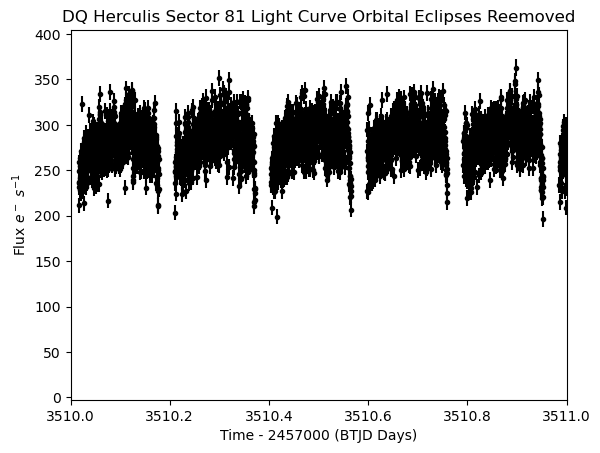

In [33]:
masked_time2 = time2[~np.isnan(new_time2)]
masked_flux2 = flux2[~np.isnan(new_time2)]
masked_flux_error2 = flux_error2[~np.isnan(new_time2)]

plt.errorbar(masked_time2, masked_flux2, masked_flux_error2, fmt='k.')
plt.xlim(3510,3511)
plt.title('DQ Herculis Sector 81 Light Curve Orbital Eclipses Reemoved')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-4.600e+00 -4.270e+00 ... -1.662e+00  4.955e-01]
           x: [ 7.902e-01  1.216e+03  9.299e-02  2.534e+02]
        cost: 1651445.7856219749
         jac: [[ 1.074e-01 -4.238e+00  2.141e-01  1.157e-01]
               [ 2.145e-02  1.129e+01 -5.705e-01  1.169e-01]
               ...
               [ 1.090e-01 -3.467e-01 -2.154e-01  1.173e-01]
               [-6.369e-02 -7.834e-01 -4.867e-01  1.169e-01]]
        grad: [ 6.849e+01 -1.612e+04  1.313e+03  6.599e-02]
  optimality: 16123.244409935123
 active_mask: [0 0 0 0]
        nfev: 29
        njev: None
   param_cov: [[ 1.799e-03  4.801e-09  2.889e-08  5.172e-07]
               [ 4.801e-09  1.764e-06  1.875e-05  5.131e-09]
               [ 2.889e-08  1.875e-05  2.724e-04  5.689e-09]
               [ 5.172e-07  5.131e-09  5.689e-09  8.996e-04]]
35.84061170033042
[[6.44872946e-02 1.72076050e-07 1.03527309e-06 1.85375868e-05]
 [1.7207

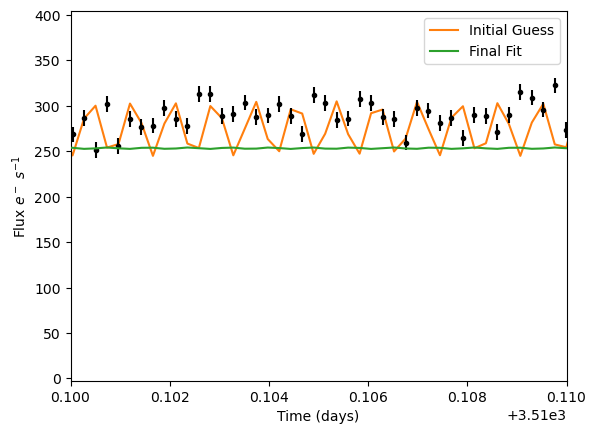

In [34]:
sine21 = models.Sine1D(amplitude=30, frequency=1215.7974780137176, phase=0)
sine22 = models.Sine1D(amplitude=10, frequency=1215.7974780137176-5.165064630178628, phase=0.25)
constant2 = models.Const1D(amplitude=275)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_spin2 = sine21 + constant2 #+ sine22

def tie_freq(model):
    return model.frequency_0 - 5.165064630178628

sine22.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine22.phase.tied = tie_phase

sin_final_spin2 = fit_sin(sin_init_spin2, masked_time2, masked_flux2, weights=1/masked_flux_error2, maxiter=1000,acc=1e-10)

print(fit_sin.fit_info)

chi2_spin2 = np.sum(((sin_final_spin2(masked_time2)-masked_flux2)/masked_flux_error2)**2)
chi2_r_spin2 = chi2_spin2/(len(masked_time2)-3)
print(chi2_r_spin2)

pfit_spin2 = fit_sin.fit_info.x
pcov_spin2 = fit_sin.fit_info.param_cov * chi2_r_spin2
print(pcov_spin2)
error_spin2 = []

for i in range(len(pfit_spin2)):
    error_spin2.append(np.absolute(pcov_spin2[i][i])**0.5)
        
perr_leastsq_spin2 = np.array(error_spin2) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_spin2)
print("perr = \ ", perr_leastsq_spin2)

plt.errorbar(masked_time2, masked_flux2, masked_flux_error2, fmt='k.', zorder=2),
plt.plot(masked_time2, sin_init_spin2(masked_time2),'C1', label='Initial Guess', zorder=1)
plt.plot(masked_time2, sin_final_spin2(masked_time2),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.legend()
plt.xlim(3510.1, 3510.11)
plt.show()

In [35]:
pspin2_model = 1/pfit_spin2[1]
pspin2_models = pspin2_model*u.day.to(u.s)

pspin2_model_error = (1/pfit_spin2[1])*(perr_leastsq_spin2[1])
pspin2_model_errors = pspin2_model_error*u.day.to(u.s)

print(pspin2_models)
print(pspin2_model_errors)

71.06482471534663
0.565071979983701


## DQ Herculis 3

In [36]:
lc3 = np.genfromtxt("dq_her8.csv", delimiter=",")
time3 = lc3[0]
flux3 = lc3[1]
flux_error3 = lc3[2]

(3315.0, 3316.0)

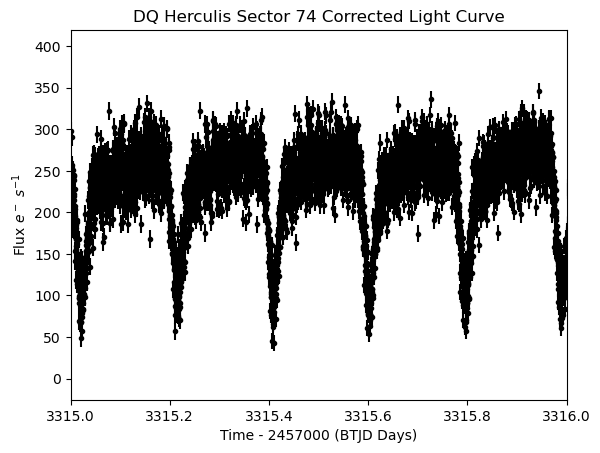

In [37]:
plt.errorbar(time3, flux3, yerr=flux_error3, fmt='k.')
plt.title('DQ Herculis Sector 74 Corrected Light Curve')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.xlim(3315,3316)

Text(30, 0.03, '6$\\Omega$')

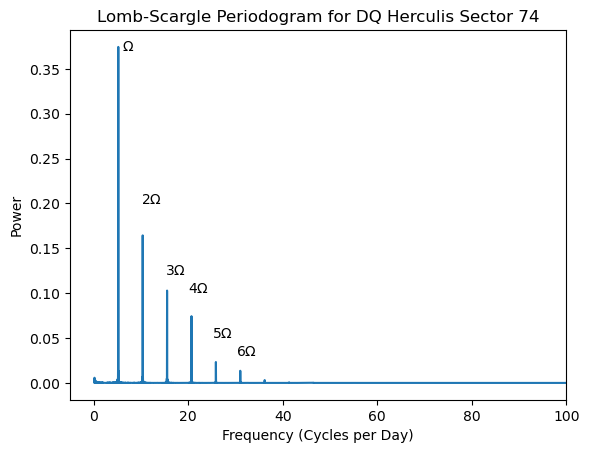

In [38]:
#Define frequency range
min_freq = 0.1  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time3)))  # Nyquist frequency

frequencies31 = np.linspace(min_freq, max_freq, 1000000) 

power31 = LombScargle(time3, flux3).power(frequencies31)

plt.plot(frequencies31, power31)
plt.title('Lomb-Scargle Periodogram for DQ Herculis Sector 74')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(-5, 100)
plt.text(6, 0.37, '$\Omega$')
plt.text(10, 0.2, '2$\Omega$')
plt.text(15, 0.12, '3$\Omega$')
plt.text(20, 0.1, '4$\Omega$')
plt.text(25, 0.05, '5$\Omega$')
plt.text(30, 0.03, '6$\Omega$' )

(0.0, 0.0002)

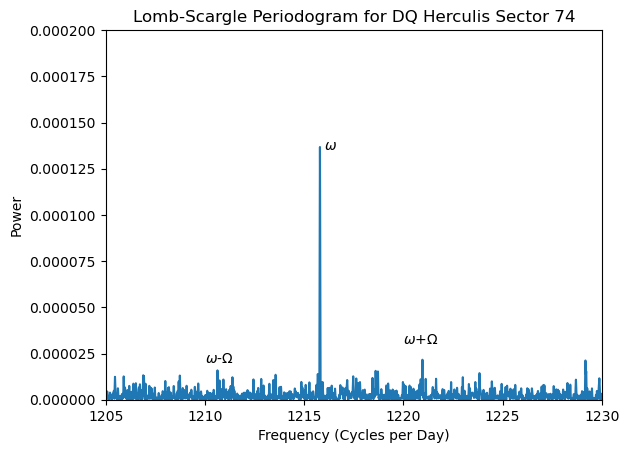

In [39]:
plt.plot(frequencies31, power31)
plt.title('Lomb-Scargle Periodogram for DQ Herculis Sector 74')
plt.ylabel('Power')
plt.xlabel('Frequency (Cycles per Day)')
plt.xlim(1205, 1230)
plt.text(1216, 0.000135, '$\omega$')
plt.text(1210, 0.00002, '$\omega$-$\Omega$')
plt.text(1220, 0.00003, '$\omega$+$\Omega$')
plt.ylim(0, 0.0002)

In [40]:
forb3 = frequencies31[np.argmax(power31)]
print(forb3)

porb3 = 1/forb3
porb3h = porb3*u.day.to(u.hour)
print(porb3h)

min_freq = 50  # Lower bound of frequencies
max_freq = 1 / (2 * np.median(np.diff(time3)))  # Nyquist frequency
frequencies32 = np.linspace(min_freq, max_freq, 1000000) 
power32 = LombScargle(time3, flux3).power(frequencies32)


fspin3 = frequencies32[np.argmax(power32)]
print(fspin3)

pspin3 = 1/fspin3
pspin3s = pspin3*u.day.to(u.s)
print(pspin3s)

5.164906632997652
4.64674421153489
1215.794862510162
71.06462008041085


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

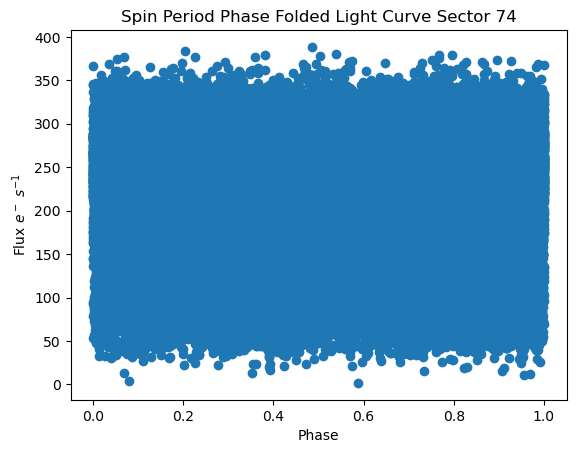

In [41]:
t3 = time3[0]

# Compute cycle number
n3 = (time3 - t3) / pspin3

# Compute new x-axis (integer cycles + phase)
spin_folded3 = (n3 % 1)

# Sort for smoother plotting
sorted_indices = np.argsort(spin_folded3)
spin_folded_sorted3 = spin_folded3[sorted_indices]
spin_flux_sorted3 = flux3[sorted_indices]

plt.scatter(spin_folded_sorted3, spin_flux_sorted3)
plt.title('Spin Period Phase Folded Light Curve Sector 74')
plt.xlabel('Phase')
plt.ylabel('Flux $e^-$ $s^{-1}$')

In [42]:
mask3 = (time3<time3[837])
orbital_section3 = time3[mask3]
orbital_flux_section3 = flux3[mask3]

min_flux3 = np.argmin(orbital_flux_section3)

print(min_flux3)
print(len(orbital_section3)) #number of points per phase
print(len(flux3))

130
837
112769


In [43]:
new_time3 = np.copy(time3)

for i in range(60, 200): # dip range
    for j in range(0,134):  # number of phases in the data set
        new_time3[i+(837*j)]=np.nan
        
print(new_time2)

[3506.5540281  3506.55425958 3506.55449105 ... 3533.17853019 3533.17876166
 3533.17899314]


Text(0, 0.5, 'Flux $e^-$ $s^{-1}$')

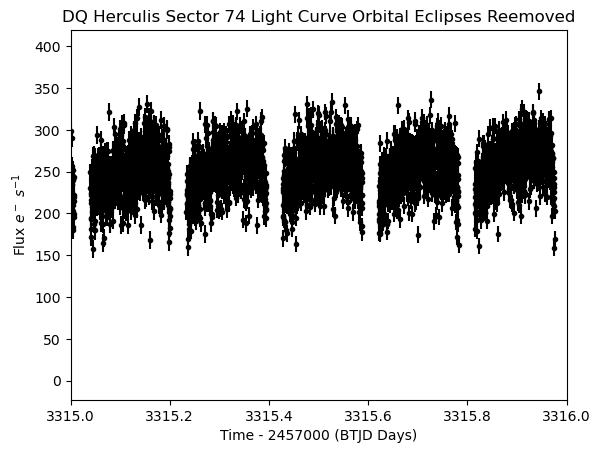

In [44]:
masked_time3 = time3[~np.isnan(new_time3)]
masked_flux3 = flux3[~np.isnan(new_time3)]
masked_flux_error3 = flux_error3[~np.isnan(new_time3)]

plt.errorbar(masked_time3, masked_flux3, masked_flux_error3, fmt='k.')
plt.xlim(3315,3316)
plt.title('DQ Herculis Sector 74 Light Curve Orbital Eclipses Reemoved')
plt.xlabel('Time - 2457000 (BTJD Days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')

     message: Both `ftol` and `xtol` termination conditions are satisfied.
     success: True
      status: 4
         fun: [-1.414e+01 -1.328e+01 ...  9.539e-01  1.852e+00]
           x: [ 3.407e-01  1.216e+03  8.118e-02  2.357e+02]
        cost: 2181465.1483301753
         jac: [[ 1.255e-01  9.348e-01  6.795e-02  1.294e-01]
               [ 6.542e-03 -3.831e+00 -2.785e-01  1.303e-01]
               ...
               [ 4.572e-02 -2.874e+00  2.562e-01  1.281e-01]
               [ 1.085e-01  1.642e+00 -1.463e-01  1.282e-01]]
        grad: [-2.103e+02 -6.510e+03  3.828e-01 -5.978e-02]
  optimality: 6510.1356783627125
 active_mask: [0 0 0 0]
        nfev: 54
        njev: None
   param_cov: [[ 1.585e-03  2.165e-09 -1.292e-08  5.306e-07]
               [ 2.165e-09  6.215e-06 -5.229e-06  4.256e-08]
               [-1.292e-08 -5.229e-06  3.502e-04 -1.578e-08]
               [ 5.306e-07  4.256e-08 -1.578e-08  7.923e-04]]
46.411189675769116
[[ 7.35449387e-02  1.00495639e-07 -5.99637686e-07  2

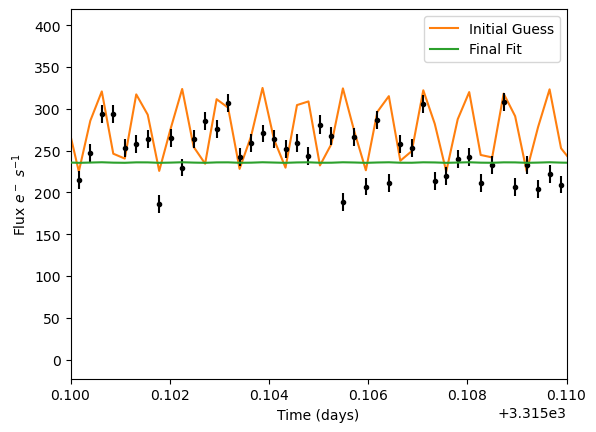

In [45]:
sine31 = models.Sine1D(amplitude=50, frequency=1215.794862510162, phase=0)
sine32 = models.Sine1D(amplitude=10, frequency=1215.794862510162-5.164906632997652, phase=0.25)
constant3 = models.Const1D(amplitude=275)

fit_sin = fitting.LMLSQFitter(calc_uncertainties=True)

sin_init_spin3 = sine31 + constant3 #+ sine32

def tie_freq(model):
    return model.frequency_0 - 5.164906632997652

sine32.frequency.tied = tie_freq

def tie_phase(model):
    return model.phase_0 + 0.25

sine32.phase.tied = tie_phase

sin_final_spin3 = fit_sin(sin_init_spin3, masked_time3, masked_flux3, weights=1/masked_flux_error3, maxiter=1000,acc=1e-10)

print(fit_sin.fit_info)

chi2_spin3 = np.sum(((sin_final_spin3(masked_time3)-masked_flux3)/masked_flux_error3)**2)
chi2_r_spin3 = chi2_spin3/(len(masked_time3)-3)
print(chi2_r_spin3)

pfit_spin3 = fit_sin.fit_info.x
pcov_spin3 = fit_sin.fit_info.param_cov * chi2_r_spin3
print(pcov_spin3)
error_spin3 = []

for i in range(len(pfit_spin3)):
    error_spin3.append(np.absolute(pcov_spin3[i][i])**0.5)
        
perr_leastsq_spin3 = np.array(error_spin3) 
        
print("Fit parameters and parameter errors from lestsq method :\ ")
print("pfit = \ ", pfit_spin3)
print("perr = \ ", perr_leastsq_spin3)

plt.errorbar(masked_time3, masked_flux3, masked_flux_error3, fmt='k.', zorder=2),
plt.plot(masked_time3, sin_init_spin3(masked_time3),'C1', label='Initial Guess', zorder=1)
plt.plot(masked_time3, sin_final_spin3(masked_time3),'C2', label='Final Fit', zorder=3)
plt.xlabel('Time (days)')
plt.ylabel('Flux $e^-$ $s^{-1}$')
plt.legend()
plt.xlim(3315.1,3315.11)
plt.show()

In [46]:
pspin3_model = 1/pfit_spin3[1]
pspin3_models = pspin3_model*u.day.to(u.s)

pspin3_model_error = (1/pfit_spin3[1])*(perr_leastsq_spin3[1])
pspin3_model_errors = pspin3_model_error*u.day.to(u.s)

print(pspin3_models)
print(pspin3_model_errors)

71.06375819918514
1.206905458084888


## Data

In [47]:
data.loc["Orbital Frequency (days⁻¹)", :] = [forb0, forb1, forb2, forb3]
data.loc["Orbital Period (hours)", :] = [porb0h, porb1h, porb2h, porb3h]
data.loc["Spin Frequency (days⁻¹)", :] = [fspin0, fspin1, fspin2, fspin3]
data.loc["Spin Period (seconds)", :] = [pspin0s, pspin1s, pspin2s, pspin3s]
data.loc["Model Spin Period (seconds)", :] = [pspin0_models, pspin1_models, pspin2_models, pspin3_models]
data.loc["Model Spin Period Error (seconds)", :] = [pspin0_model_errors, pspin1_model_errors, pspin2_model_errors, pspin3_model_errors]
data.loc["Model Spin Period Reduced χ2", :] = [chi2_r_spin0, chi2_r_spin1, chi2_r_spin2, chi2_r_spin3]
print(data)

                                   0: Sector80  1: Sector79  2: Sector81  \
Orbital Frequency (days⁻¹)            5.164978     5.164912     5.165065   
Orbital Period (hours)                4.646680     4.646739     4.646602   
Spin Frequency (days⁻¹)            1215.791879  1215.793112  1215.797478   
Spin Period (seconds)                71.064794    71.064722    71.064467   
Model Spin Period (seconds)          71.064760    71.064859    71.064825   
Model Spin Period Error (seconds)     1.854903     0.447394     0.565072   
Model Spin Period Reduced χ2         36.126678    20.035294    35.840612   

                                   3: Sector74  
Orbital Frequency (days⁻¹)            5.164907  
Orbital Period (hours)                4.646744  
Spin Frequency (days⁻¹)            1215.794863  
Spin Period (seconds)                71.064620  
Model Spin Period (seconds)          71.063758  
Model Spin Period Error (seconds)     1.206905  
Model Spin Period Reduced χ2         46.411190  

In [48]:
data.to_csv("DQ_Herculis_Spin_Periods.csv")